WHO-COVID-19-global-daily-data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Econometrics.Coronavirus.code.read_data import dta
import statsmodels.api as sm

## NUMERICAL SOLUTION

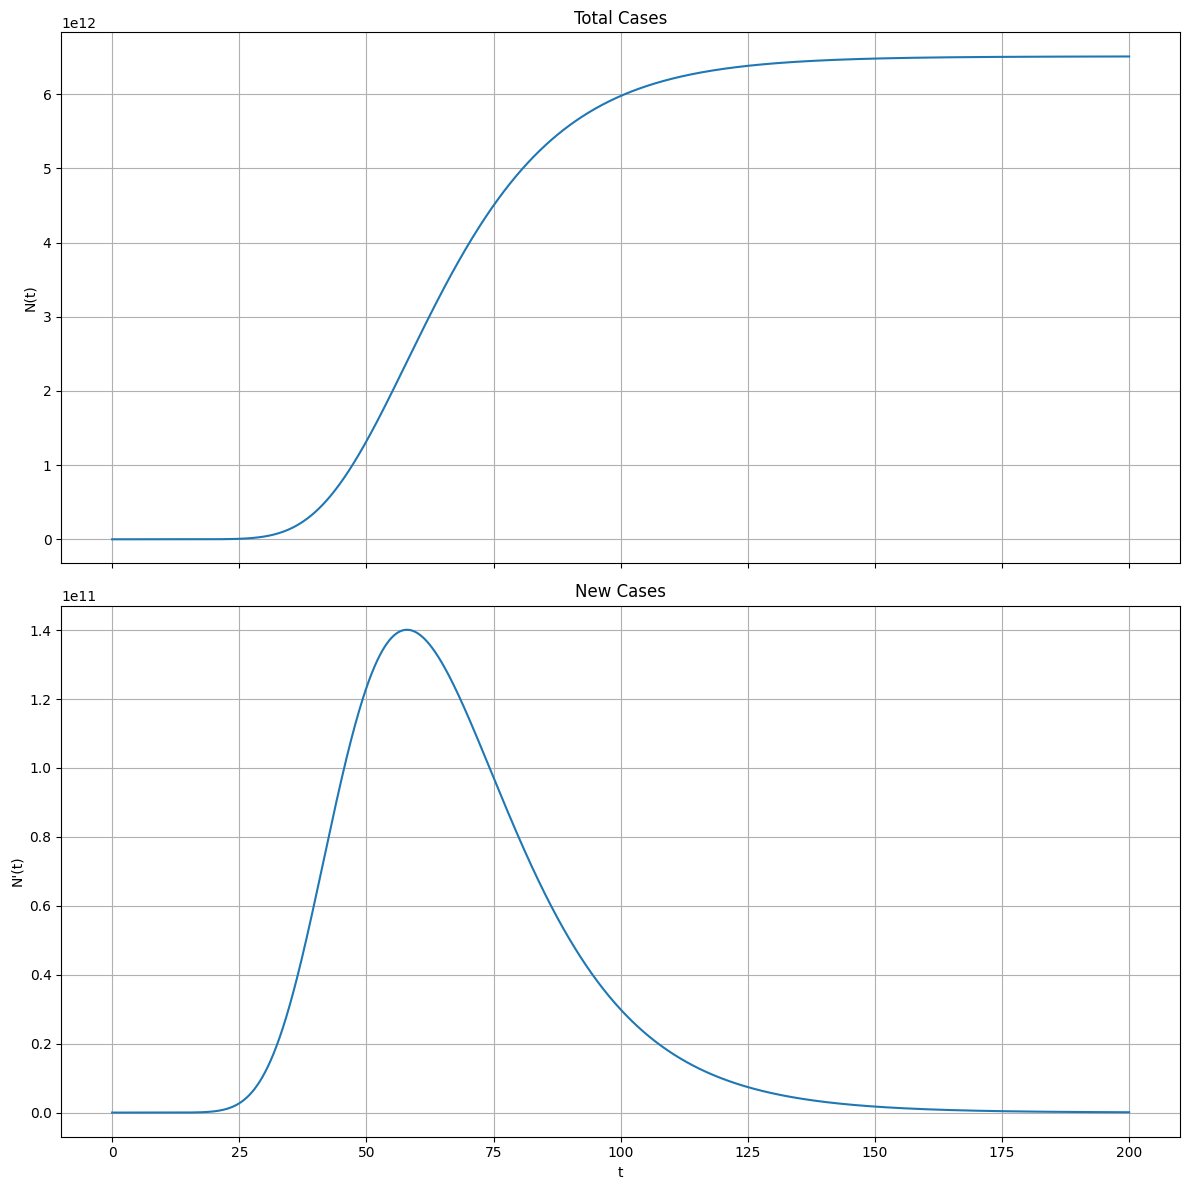

In [65]:
# parameters
gamma_1 = 1.726 # alpha_1 + alpha_2
gamma_2 = -0.0585 #epsilon* alpha_2
x0 = 1.0
sigma =500

# gradient
def diffeq(x, t=None):
    dxdt = gamma_1 * x + gamma_2 * x * np.log(x)
    return dxdt

# number of points
n=20000
dt=0.01

# time points
t_grid = np.linspace(0,n*dt, n)

# preallocate array for solution
x = np.zeros(n)

x[0]=x0

for i in range(1,n):
    t = t_grid[i]
    dx = dt*diffeq(x[i-1], t) 
    x[i] = x[i-1]+dx

# compute derivative of solution
#dxdt = alpha_1 * x + alpha_2 * x ** (1 + epsilon)
dxdt = diffeq(x, t_grid)

# val = max(int(1/dt),1)
# x=x[::val]
# t_grid=t_grid[::val]
# dxdt = dxdt[::val] #+ np.random.normal(0,sigma, len(x))


# create two subplots that share the same x-axis
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# plot the solution on the first subplot
axs[0].plot(t_grid, x)
axs[0].set_ylabel('N(t)')
axs[0].set_title('Total Cases')
axs[0].grid()

# plot the derivative on the second subplot
axs[1].plot(t_grid, dxdt)
axs[1].set_xlabel('t')
axs[1].set_ylabel("N'(t)")
axs[1].set_title("New Cases")
axs[1].grid()

# layout so plots do not overlap
fig.tight_layout()

plt.show()

# PLOT DATA + SOLUTION

In [66]:
y = dta["Cumulative_cases"]
x = dta["Cumulative_cases_lag_1"]

# Add a constant to the independent value
x = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x).fit()

# Get the predicted values
y_pred = model.predict(x)

x=x[x.columns[1]]
y_pred_2 = diffeq(x)

KeyError: 'Cumulative_cases_lag_1'

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x, y, marker='.', label='Real Data', color='purple')
plt.plot(x, y_pred, label='OLS prediction', color='red')
plt.plot(x, y_pred_2, label='GMM prediction', color='green')

plt.ylabel(r'$N_t$')
plt.xlabel(r'$N_{t-1}$')
plt.title('Total Cases')
plt.legend()
plt.show()

In [ ]:
# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Zoom in on the first part of the plot
axs[0].scatter(x, y, marker='.', color='purple')
axs[0].plot(x, y_pred, color='red')
axs[0].plot(x, y_pred_2, label='GMM prediction', color ='green')
axs[0].set_xlim(0, 5000)  # Set the x-axis limits to zoom in
axs[0].set_ylim(0, 5000)  # Set the y-axis limits to zoom in
axs[0].set_title('Zoomed In [0,5k]')

# Zoom in on the second part of the plot
axs[1].scatter(x, y, marker='.', color='purple')
axs[1].plot(x, y_pred, color='red')
axs[1].plot(x, y_pred_2, label='GMM prediction', color ='green')
axs[1].set_xlim(100000, 120000)  # Set the x-axis limits to zoom in
axs[1].set_ylim(100000, 120000)  # Set the y-axis limits to zoom in
axs[1].set_title('Zoomed In [100k,120k]')

# Zoom in on the third part of the plot
axs[2].scatter(x, y, marker='.', color='purple')
axs[2].plot(x, y_pred, color='red')
axs[2].plot(x, y_pred_2, label='GMM prediction', color ='green')
axs[2].set_xlim(220000, 230000)  # Set the x-axis limits to zoom in
axs[2].set_ylim(220000, 230000)  # Set the y-axis limits to zoom in
axs[2].set_title('Zoomed In [220k, 230k]')


plt.tight_layout()
plt.show()


## Infection curve

In [53]:
time = np.arange(len(dta['Date_reported']))
N = dta['Cumulative_cases']

gamma_1 = 1.72 # from GMM
gamma_2 = -0.058 # from GMM

# print(N)
x0 = N.iloc[0]

#c=np.log(gamma_1+gamma_2*np.log(x0))/gamma_2
c= 11.35

def solution(t):
    x= np.exp((np.exp(gamma_2*(t+c))-gamma_1+1)/gamma_2)
    return x

N_pred = solution(time)


print(c)

11.35


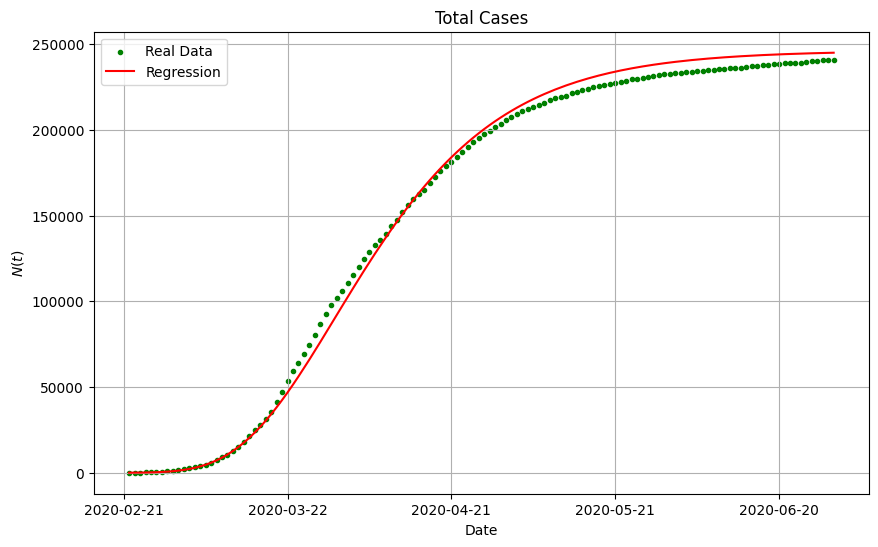

In [63]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))


plt.scatter(dta['Date_reported'], N, marker='.', label='Real Data', color='green')
plt.plot(dta['Date_reported'], N_pred, label='Regression', color='red')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.ylabel(r'$N(t)$')
plt.xlabel('Date')
plt.title('Total Cases')
plt.grid()
plt.legend()
plt.show()

In [61]:
time = np.arange(len(dta['Date_reported']))
N_prime = dta['New_cases']

K_opt = 0.5175
N_prime_pred = K_opt* np.exp(gamma_2*time)*solution(time)

print(c)

11.35


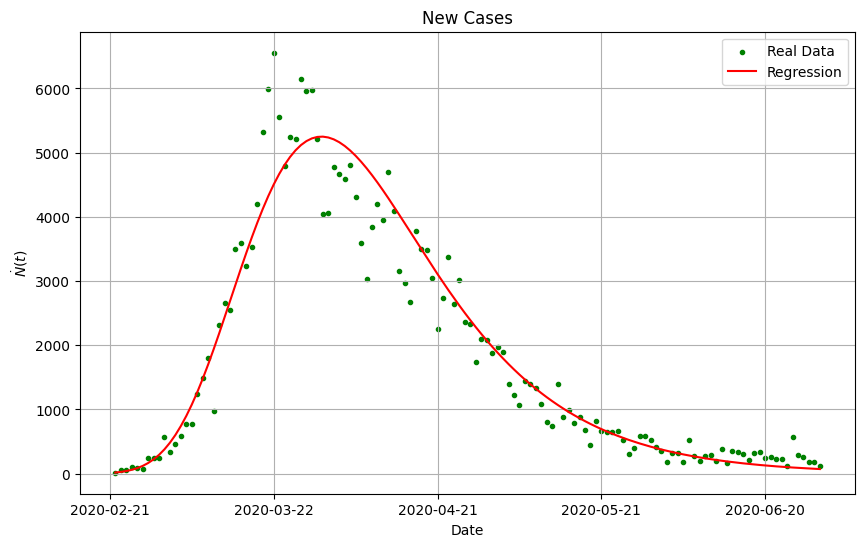

In [64]:
plt.figure(figsize=(10, 6))


plt.scatter(dta['Date_reported'], N_prime, marker='.', label='Real Data', color='green')
plt.plot(dta['Date_reported'], N_prime_pred, label='Regression', color='red')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.ylabel(r'$\dot N (t)$')
plt.xlabel('Date')
plt.title('New Cases')
plt.legend()
plt.grid()
plt.show()

In [51]:
time = np.arange(len(dta['Date_reported']))
N = dta['Cumulative_cases']

gamma_1 = 1.72 # from GMM
gamma_2 = -0.058 # from GMM

# print(N)
x0 = N.iloc[0]

#c=np.log(gamma_1+gamma_2*np.log(x0))/gamma_2
c= 10

def funct(K):
    x= np.exp((K*np.exp(gamma_2*time)-gamma_1+1)/gamma_2)
    return x

K_min = -7
K_max = 10
points = 200

old_loss = 10**50
K_opt =0 

for K in np.linspace(K_min, K_max, points):
    loss = np.sum((funct(K)-N)**2)
    if loss < old_loss:
        old_loss = loss
        K_opt = K

print(old_loss,K_opt, np.exp((K_opt-gamma_1)/gamma_2))

3467770420.430251 0.5175879396984921 1008008479.7307602


In [52]:
np.log(K_opt)/gamma_2

np.float64(11.354755801635468)